In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('text', usetex = True)

# function for computing polynomial derivatives
def poly_deriv(data,fit_order,param_values):
    mid = np.int((len(param_values)-1)/2)
    #fit = np.poly1d(np.polyfit(param_values,data,fit_order))(param_values)
    derivative = np.poly1d(np.polyder(np.polyfit(param_values,data,fit_order)))(param_values[mid])
    return derivative

# function for computing r^2 residuals of polynomial derivatives
def get_residual(data,fit_order,param_values):
    mid = np.int((len(param_values)-1)/2)
    resid = np.polyfit(param_values,data,fit_order,full = True)
    return resid

# angular power spectrum
pl = [np.load('Data/pl_m%s.npy'%(i)) for i in range(1,12)]

# Compute Derivatives and their Residuals

In [7]:
# derivative values
deriv = []
# residuals of polynomial fit (should be <<< 1)
residual = []
for m in range(11):
    print('Running mass',m+1,'/ 11')
    h1 = []
    r1 = []
    # parameter dimension
    for i in range(5):
        h2 = []
        r2 = []
        # zbin dimension 1
        for y in range(5):
            h3 = []
            r3 = []
            # zbin dimension 2
            for j in range(5):
                h4 = []
                r4 = []
                # ell dimension
                for e in range(2998):
                    r4.append(get_residual(pl[m][i][y][j][e],4,params[i])[1][0])
                    h4.append(poly_deriv(pl[m][i][y][j][e],4,params[i]))
                h3.append(h4)
                r3.append(r4)
            h2.append(h3)
            r2.append(r3)
        h1.append(h2)
        r1.append(r2)
    deriv.append(h1)
    residual.append(r1)

np.save('deriv.npy',deriv)
np.save('residual.npy',residual)

# Plot Derivatives and their Residuals

(11, 5, 6, 6, 2998)


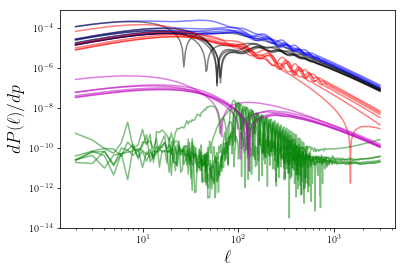

In [8]:
deriv = np.load('Data/deriv.npy')
residuals = np.load('Data/residual.npy')
lgoal = np.arange(2,3000,1)
print(np.shape(deriv))
mass_index = 5
#bins = 2
#for j in range(11):
for i in range(6):
    bins = i
    plt.plot(lgoal,np.abs(deriv[mass_index][0][bins][bins]),label = r'$\Omega_b$',color = 'b',alpha = 0.5)
    plt.plot(lgoal,np.abs(deriv[mass_index][1][bins][bins]),label = r'$\Omega_{dm}$',color = 'k',alpha = 0.5)
    plt.plot(lgoal,np.abs(deriv[j][2][bins][bins]),label = r'$f_a$',color = 'g',alpha = 0.5)
    plt.plot(lgoal,np.abs(deriv[mass_index][3][bins][bins]),label = r'$n_s$',color = 'r',alpha = 0.5)
    plt.plot(lgoal,np.abs(deriv[mass_index][4][bins][bins]),label = r'$H_0$',color = 'm',alpha = 0.5)
    #plt.plot(lgoal,np.asarray(400)*deriv[mass_index][4][bins][bins],label = r'$400\times H_0$',color = 'm',alpha = 0.5)
plt.xscale('log')
plt.xlabel(r'$\ell$',size = 18)
plt.ylabel('$dP(\ell)/dp$',size = 18)
# plt.legend(frameon = False,loc = 'lower right',fontsize = 14)
# plt.savefig('derivative.pdf')
plt.yscale('log')
plt.show()

# plt.plot(lgoal,residuals[4][0][0][0],label = r'$\Omega_b$')
# plt.plot(lgoal,residuals[4][1][0][0],label = r'$\Omega_{dm}$')
# plt.plot(lgoal,residuals[4][2][0][0],label = r'$f_a$')
# plt.plot(lgoal,residuals[4][3][0][0],label = r'$n_s$')
# plt.plot(lgoal,residuals[4][4][0][0],label = r'$H_0$')
# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel(r'$\ell$',size = 14)
# plt.ylabel(r'$r^2$',size = 14)
# plt.legend(frameon = False,fontsize = 14)
# plt.savefig('residual.pdf')

zosc occurs at such high-z that I'm not sure why it matters when we only run power spectra up to z = 4.5

normalize using omega_ax*h^2*rho_crit

dloga_table and grhoax_table are both log10 (10** to undo)

a is only in the range for which a < a_osc --> after that just use a^3 scaling

need to normalize grhoax_table -- find in fortran code